In [3]:
from utamethodstest import *
import numpy as np
from matplotlib import pyplot as plt

/home/nikos/PycharmProjects/PycharmProjects/MultiCrit/utamethodstest.py:146: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if utilities is 'UTA':
/home/nikos/PycharmProjects/PycharmProjects/MultiCrit/utamethodstest.py:150: SyntaxWarning: "is" with a literal. Did you mean "=="?
  elif utilities is 'UTASTAR':


<p>Για την εφαρογή των μεθόδων UTA και UTASTAR ο χρήστης χρειάζζεται να εισάγει τα εξής δεδομένα:</p>
<p>data: Η μεταβλητή αυτή αφορά τα δεδομένα του πολυκριτήριου πίνακα, τα οποία
εισάγονται είτε σε μορφή pandas data frame είτε σε numpy array. Στην περίπτωση
που εισαχθούν σε μορφή pandas data frame θα πρέπει να περιέχεται και μία στήλη
με ετικέτα “Ranking” ή “Rank” που θα περιγράφει τις κατατάξεις</p>
<p>alternatives: Δέχεται σε μορφή λίστας τα ονόματα των εναλλακτικών. Σε περίπτωση που δεν
εισαχθεί το σύστημα ονομάζει τις εναλλακτικές ως alternative1, alternative2,...</p>
<p>criteria: Δέχεται σε μορφή λίστας τα ονόματα των κριτηρίων. Σε περίπτωση που δεν
εισαχθεί το σύστημα ονομάζει τα κριτήρια criteria1, criteria2...</p>
<p>ranking: Δέχεται σε μορφή λίστας ή πίνακα numpy την κατάταξη των εναλλακτικών. Σε
περίπτωση pandas dataframe δεν χρειάζεται η εισαγωγή αυτής της μεταβλητής</p>
<p>monotonicity: Δέχεται σε μορφή λίστας ή πίνακα numpy την μονοτονία των εναλλακτικών τιμών
με αποδεκτές τιμές 1 για αύξουσα μονοτονία και 0 για φθίνουσα</p>
<p>bestvalues: Δέχεται σε μορφή λίστας ή πίνακα numpy τις καλύτερες τιμές που μπορεί να λάβει
κάθε κριτήριο. Σε περίπτωση που δεν συμπληρωθεί ο πίνακας η συνάρτηση λαμβάνει σαν την καλύτερη τιμή την τιμή του πολυκριτήριου πίνακα, έχοντας
υπόψιν την μονοτονία του κριτηρίου.</p>
<p>worstvalues: Δέχεται σε μορφή λίστας ή πίνακα numpy τις χειρότερες τιμές που μπορεί να λάβει
κάθε κριτήριο. Σε περίπτωση που δεν συμπληρωθεί ο πίνακας η συνάρτηση
λαμβάνει σαν την χειρότερη τιμή την τιμή του πολυκριτήριου πίνακα, έχοντας
υπόψιν την μονοτονία του κριτηρίου.</p>
<p>intervals: Δέχεται σε μορφή λίστας ή πίνακα numpy τα διαστήματα στα οποία θα χωριστεί το
κάθε κριτήριο. Αν δεν δοθεί τιμή χωρίζει όλα τα κριτήρια σε 3 διαστήματα</p>
<p>method: Δέχεται σαν είσοδο την μέθοδο με την οποία θα επιλυθεί το γραμμικό πρόβλημα.
Οι αποδεκτές τιμές είναι αυτές που δέχεται η linprog της scipy, δηλαδή οι τιμές
“simplex” και “interior-point”.</p>
<p>epsilon: Η μεταβλητή epsilon καθορίζει το αποδεκτό σφάλμα που ο χρήστης είναι
διατεθειμένος να αποδεχτεί κατά την διάρκεια της μετά-βελτιστοποίησης .
Προκαθορισμένη τιμή είναι 0,005.</p>
<p>delta: Η μεταβλητή delta ορίζει την ελάχιστη απόσταση μεταξύ της κατάταξης μίας
εναλλακτικής με την αμέσως χειρότερη της κατά την δόμηση του γραμμικού
προβλήματος. Προκαθορισμένη τιμή είναι 0,05.</p>
<p>sigma(μονο για την UTA): Η μεταβλητή sigma καθορίζει την ελάχιστη διαφορά που πρέπει να έχουν οι
χρησιμότητες ενός κριτηρίου όσο αυξάνεται η τιμή σου στο διακριτό διάστημα.
Προκαθορισμένη τιμή είναι 0.</p>

In [4]:
df = np.array([[173, 11.4, 10.01, 10, 7.88, 49500],
               [176, 12.3, 10.48, 11, 7.96, 46700],
               [142, 8.2,  7.3,    5, 5.65, 32100],
               [148, 10.5, 9.61,   7, 6.15, 39150],
               [178, 14.5, 11.05, 13, 8.06, 64700],
               [180, 13.6, 10.4,  13, 8.47, 75700],
               [182, 12.7, 12.26, 11, 7.81, 68593],
               [145, 14.3, 12.95, 11, 8.38, 55000],
               [161, 8.6,  8.42,  7,  5.11, 35200],
               [117, 7.2,  6.75,  3,  5.81, 24800]])
alternatives = ["Pegaut 505GR", "Opel Record", "Citroen Visa", "VW Golf","Citroen CX", "Mercedes 230", "BMW 520", "Volvo 244","Pegaut 104", "Citroen dyane"]
ranking = [1, 2, 3,  4, 5, 6, 7, 8, 9, 10]
bestvalues = [190, 7, 6, 13, 9, 20000]
worstvalues = [110, 15, 13, 3, 5, 80000]
monotonicity = [1, 0, 0, 1, 1, 0]
intervals = [4, 3, 3, 4, 3, 4]

<p>Παραπάνω παρουσιάζεται το παράδειγμα της βιβλιογραφίας για την επιλογή αυτοκινήτου</p>

In [5]:
res1 = UTA(data=df, ranking=ranking,alternatives=alternatives, bestvalues=bestvalues,worstvalues=worstvalues, 
          monotonicity=monotonicity, intervals=intervals, epsilon=0.0009, delta=0.01, method='simplex')

In [6]:
print(res1)

              g: [[110.0, 130.0, 150.0, 170.0, 190.0], [15.0, 12.333333333333334, 9.666666666666668, 7.0], [13.0, 10.666666666666666, 8.333333333333332, 6.0], [3.0, 5.5, 8.0, 10.5, 13.0], [5.0, 6.333333333333333, 7.666666666666666, 9.0], [80000.0, 65000.0, 50000.0, 35000.0, 20000.0]]
       criteria: ['criterion1', 'criterion2', 'criterion3', 'criterion4', 'criterion5', 'criterion6']
     crit_names: ['u1.1', 'u1.2', 'u1.3', 'u1.4', 'u1.5', 'u2.1', 'u2.2', 'u2.3', 'u2.4', 'u3.1', 'u3.2', 'u3.3', 'u3.4', 'u4.1', 'u4.2', 'u4.3', 'u4.4', 'u4.5', 'u5.1', 'u5.2', 'u5.3', 'u5.4', 'u6.1', 'u6.2', 'u6.3', 'u6.4', 'u6.5']
 crit_utilities: array([0.        , 0.099065  , 0.109065  , 0.1242647 , 0.1342647 ,
       0.        , 0.01563149, 0.15923063, 0.17708443, 0.        ,
       0.02662599, 0.04688095, 0.14557453, 0.        , 0.14102649,
       0.15825175, 0.1685391 , 0.18113013, 0.        , 0.1653078 ,
       0.24035982, 0.25069465, 0.        , 0.03572071, 0.06131761,
       0.07616826, 0.111251

<p>Επιλύωντας την μέθοδο UTA μπορούμε να δούμε τα διάφορα γνωρίσματα του αποτελέσματος.Το αποτέλεσμα είναι σε μορφή αντικειμένου. Προκειμένου να έχουμε πρόσβαση σε ένα γνώρισμα όπως οι χρησιμότητες κριτηρίων απλά χρειάζεται να το καλέσουμε. </p>


In [7]:
for i in range(len(res1.crit_names)):
    print(res1.crit_names[i]+' = '+str(res1.crit_utilities[i]))


u1.1 = 0.0
u1.2 = 0.09906500359785816
u1.3 = 0.10906500359785817
u1.4 = 0.12426470005916676
u1.5 = 0.13426470005916677
u2.1 = 0.0
u2.2 = 0.015631491148460425
u2.3 = 0.15923062855229728
u2.4 = 0.17708443189183562
u3.1 = 0.0
u3.2 = 0.026625985452678066
u3.3 = 0.046880945591864176
u3.4 = 0.14557452916914326
u4.1 = 0.0
u4.2 = 0.14102648925616074
u4.3 = 0.15825175135779784
u4.4 = 0.16853909571473685
u4.5 = 0.18113013450970447
u5.1 = 0.0
u5.2 = 0.16530780128640707
u5.3 = 0.240359816019211
u5.4 = 0.25069465243919803
u6.1 = 0.0
u6.2 = 0.03572071124439852
u6.3 = 0.06131761458124321
u6.4 = 0.0761682607537496
u6.5 = 0.11125155193094911


<p>Όσο αφορά τα αποτελέσματα υπάρχει μία απόκλιση στις τιμές των χρησιμοτήτων καθώς η UTA έχει προγραμματιστεί να δέχεται την τιμή epsilon σαν μία προστιθέμενη τιμή όπως στην UTASTAR και όχι σαν πολλαπλάσιο του σφάλματος όπως στην βιβλιογραφία.</p>

<p>Παρακάτω παρουσιάζεται το παράδειγμα των μεταφορικών μέσων από την βιβλιογραφία, πάνω στο οποίο εφαρρμόζεται η UTASTAR. </p>

In [8]:
df = np.array([[3, 10, 1],
               [4, 20, 2],
               [2, 20, 0],
               [6, 40, 0],
               [30, 30, 3]])
ranking = [1, 2, 2, 3,  4]
alternatives = ['a', "b", "c", 'd', 'f']
criteria = ['Price','Time','Comfort']
bestvalues = [2, 10, 3]
worstvalues = [30, 40, 0]
monotonicity = [0, 0, 1]
intervals = [2, 3, 3]

In [9]:
res2 = UTASTAR(df, ranking=ranking, criteria=criteria,alternatives=alternatives, bestvalues=bestvalues,
              worstvalues=worstvalues, monotonicity=monotonicity, intervals=intervals)


In [10]:
print(res2)

              g: [[30.0, 16.0, 2.0], [40.0, 30.0, 20.0, 10.0], [0.0, 1.0, 2.0, 3.0]]
       criteria: ['Price', 'Time', 'Comfort']
     crit_names: ['u1.1', 'u1.2', 'u1.3', 'u2.1', 'u2.2', 'u2.3', 'u2.4', 'u3.1', 'u3.2', 'u3.3', 'u3.4']
 crit_utilities: array([0.        , 0.39041667, 0.50708333, 0.        , 0.        ,
       0.01833333, 0.34      , 0.        , 0.01833333, 0.01833333,
       0.15291667])
        w_names: ['w1.1', 'w1.2', 'w2.1', 'w2.2', 'w2.3', 'w3.1', 'w3.2', 'w3.3']
              w: array([[0.39041667, 0.11666667, 0.        , 0.01833333, 0.32166667,
        0.01833333, 0.        , 0.13458333]])
          all_w: array([[0.7675 , 0.175  , 0.     , 0.     , 0.0325 , 0.025  , 0.     ,
        0.     ],
       [0.045  , 0.     , 0.     , 0.055  , 0.9    , 0.     , 0.     ,
        0.     ],
       [0.35875, 0.175  , 0.     , 0.     , 0.0325 , 0.03   , 0.     ,
        0.40375]])
   alternatives: ['a', 'b', 'c', 'd', 'f']
 alts_utilities: array([0.85708333, 0.52708333, 0.5

<P>Αντίστοιχα με την UTA μπορούμε να δούμε τα γνωρίσματα με την εντολή print, μέσα στα οποία βρίσκονται οι χρησιμότητες των κριτηρίων και των εναλλακτικών. Σε αυτό το παράδειγμα θα οτικοποιήθούν οι χρησιμότητες των εναλλακτικών και τα σφάλματα.</P>

In [11]:
for countAlts in range(len(res2.alternatives)):
    print(res2.alternatives[countAlts]+" = "+str(res2.alts_utilities[countAlts]))

print("\n")
countError = 0
for countAlts in range(len(res2.alternatives)):
    errorplus = 's'+res2.alternatives[countAlts]+"+"+" = "+str(res2.errors[countError])
    errorminus = 's'+res2.alternatives[countAlts]+"-"+" = "+str(res2.errors[countError+1])
    print(errorplus)
    print(errorminus)
    countError +=2


a = 0.8570833333333332
b = 0.5270833333333331
c = 0.5254166666666665
d = 0.4737499999999999
f = 0.1529166666666667


sa+ = 0.0016666666666666668
sa- = 0.0
sb+ = 0.0
sb- = 0.0016666666666666668
sc+ = 0.0
sc- = 0.0
sd+ = 0.0016666666666666668
sd- = 0.0
sf+ = 0.0
sf- = 0.0


<p>Καθώς η UTADIS αποτελεί μέθοδο ταξινόμησης χρησιμοποιεί διαφορετικά δεδομένα εισόδου. Επιπλέον σε αντίθεση με την UTA και την UTASTAR δεν καλείται σαν συνάρτηση αλλά σαν κλάση και η επιλυσή του προβλήματος γίνεται μέσω των μεθόδων της κλάσης  </p>
<p>Τα δεδομένα που χρειάζονται για την εφαρμογή της μεθόδου είναι:</p>
<p>groups: Δέχεται σε μορφή λίστας τις ομάδες για κάθε εναλλακτική. Η εισαγωγή της
μεταβλητής είναι υποχρεωτική.</p>
<p>pref_order: Δέχεται σε μορφή λίστας τις προκαθορισμένες ομάδες με αύξουσα σειρά
ξεκινώντας από την θέση 0 της λίστας, μέχρι την τελευταία. Η εισαγωγή της
μεταβλητής είναι υποχρεωτική.</p>

<p>Μέσω του παραδείγματος από το άρθρο του Ζυγομήτρου γίνετται βηματική επίληση της μεθόδου.</p>

In [12]:
df = np.array([[180, 2, 3], 
               [200, 2, 2], 
               [40, 3, 3], 
               [80, 3, 3], 
               [100, 2, 1], 
               [70, 1, 2],
               [120, 1, 1]])
pref_order = ['NO', '?', 'YES']
groups = ['YES','YES','?','YES','?','NO','NO']
bestvalues = [200, 3, 3]
worstvalues = [0, 1, 1]
intervals = [4, 2, 2]

In [13]:
res = UTADIS()
x = res.fit(data=df, groups=groups, pref_order=pref_order, 
        bestvalues=bestvalues, worstvalues=worstvalues, 
        intervals=intervals, epsilon=0.005, delta=0.05,
        sigma=0.1, method='interior-point')

<p>Αρχικά ορίζεται η μεταβλητή res ως κλάση UTADIS και στην συνέχεια εκτελείται η μέθοδος fit που δημιουργεί το μοντέλο με το οποίο θα γίνουν οι προβλέψεις. Το μεντέλο εκχωρείται στην μεταβλητή x ωστε να μπορεί να γίνει οπτική απεικόνιση των χρησιμοτήτων.</p>


In [14]:
print(x)

                g: [[0, 50.0, 100.0, 150.0, 200.0], [1, 2.0, 3.0], [1, 2.0, 3.0]]
         w_values: array([0.09080108, 0.16051428, 0.02314407, 0.14839371, 0.31365683,
       0.05990295, 0.09357931, 0.11000778])
            all_w: array([[3.79281750e-01, 3.36095787e-09, 5.03306785e-10, 4.75718252e-01,
        6.48135486e-02, 5.61513921e-02, 1.30944054e-09, 2.40350631e-02],
       [7.36382659e-12, 7.50000000e-02, 3.84701312e-02, 7.74559924e-11,
        8.08336223e-01, 6.66637773e-02, 1.15298687e-02, 2.31005961e-11],
       [1.04597297e-09, 3.86538458e-01, 6.58576212e-10, 1.48440143e-09,
        4.50000047e-02, 6.53671742e-10, 2.31923075e-01, 3.36538464e-01],
       [3.91744284e-12, 7.49999995e-02, 1.33771316e-11, 2.34948512e-11,
        6.78314244e-01, 8.46653230e-03, 2.27901570e-01, 1.03176554e-02],
       [1.00806524e-01, 2.45560477e-01, 3.38924369e-11, 2.29356157e-01,
        4.50000000e-02, 2.68056356e-12, 9.01213196e-02, 2.89155522e-01],
       [6.47182095e-02, 1.80986731e-01, 1.00

<p>Στην συνέχεια για ένα σετ δεδομένων με άγνωστες ομάδες γίνεται εφαρμογή του μοντέλου για πρόβλεψη των ομάδων. Η πρόβλεψη γίνεται με την χρήση της εντολής predict ενώ αν θέλουμε να δούμε την συνολική χρησιμότητα καλούμε την εντολή altsestimation αμέσως μετά το predict.</p>

In [15]:
data = np.array([[40, 3, 2],
                 [130, 1, 3],
                 [80, 2, 3],
                 [30, 3, 3],
                 [70, 2, 1],
                 [150, 1, 1],
                 [60, 2, 2],
                 [180, 1, 2]])

y = res.predict(data)
d = res.altsestimation()

print(y)
print(d)
print(x.transitionpoints)

['?', '?', '?', '?', '?', 'NO', '?', '?']
[0.53977995 0.46878889 0.70435357 0.63162752 0.46866362 0.27445943
 0.53014007 0.45707496]
[0.7173027  0.43424159]


<p>Η εργαλειοθήκη δίνει την δυνατότητα να οπτικοποιήσει τα αποτελέσματα των μεθόδων δημιουργώντας γρφήματα. Για τη δημιουργία γραφημάτων καλούμε είτε την εντολή criteriaPlot() είτε την alternativesPlot() και εισάγουμε σαν μέσα στις εντολές το αντικείμενο για το οποίο θέλουμε να γίνει η οπτικοποίηση. Από κάτω φαίνετι ένα παράδειγμα χρήσης της criteriaPlot πάνω στα δεδομένα της UTASTAR και ένα παράδειγμα της alternativesPlot πάνω στα δεδομένα της UTA.</p>

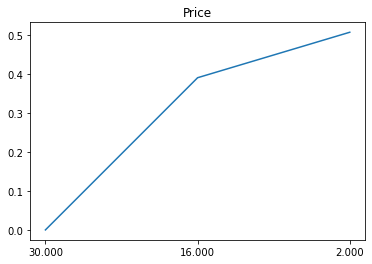

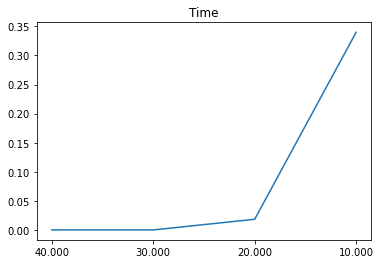

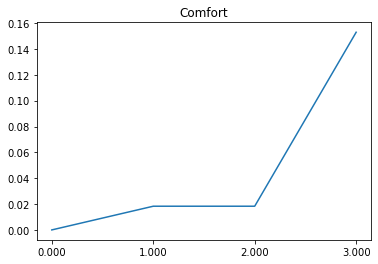

0

In [18]:
criteria_plot(res2)

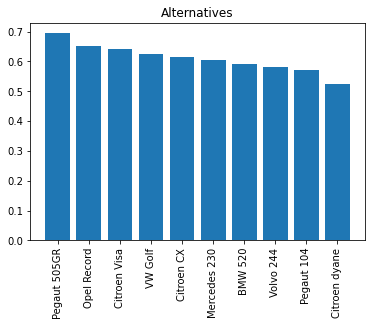

0

In [19]:
alternatives_plot(res1)